# **Introduction**

The Project concerns Lennox Street Grocer, a grocer-coffee-wine shop based in Dublin, Ireland.

The "Clustering by Transaction" analysis is where I took every transaction from the last two years to analyse patterns in the purchase of products from different categories.

Conclusions in the end.


In [ ]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT *
FROM `lsg-389008.sales_analysis.turnover_category`
ORDER BY rand()
'''
df = pd.read_gbq(query, project_id="lsg-389008")
df.head()


Transaction_ID  Drinks_in_store  Wine  Bread  Gift_Packs  \
0  2i5esLX5LSb3KyapgOqb5bweV              0.0   0.0    0.0         0.0   
1  qWyeRh360Msj1v5oXkc5P93eV              0.0   0.0    0.0         0.0   
2  krkTSVanuGr3B7npIERxlXqeV              0.0   0.0    0.0         0.0   
3  S0GNZtnWTYd6QcxlHJK6fIoeV              0.0   0.0    0.0         0.0   
4  6CzvE6WPgpn5yQx0Gm3B5uAfV              0.0   0.0    0.0         0.0   

   Grocery  Misc  Events  Cafe  Non_food_gifts  Pastries  Sandwiches  
0      0.0   0.0     0.0   3.5             0.0      0.00         0.0  
1      0.0   0.0     0.0   3.5             0.0      0.00         7.5  
2      3.5   0.0     0.0   0.0             0.0      3.25         0.0  
3      8.0   0.0     0.0   0.0             0.0      0.00         0.0  
4      0.0   0.0     0.0   8.0             0.0      0.00         0.0

In [ ]:
df_orders = df.drop(['Transaction_ID'],axis='columns')

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80832 entries, 0 to 80831
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Drinks_in_store  80832 non-null  float64
 1   Wine             80832 non-null  float64
 2   Bread            80832 non-null  float64
 3   Gift_Packs       80832 non-null  float64
 4   Grocery          80832 non-null  float64
 5   Misc             80832 non-null  float64
 6   Events           80832 non-null  float64
 7   Cafe             80832 non-null  float64
 8   Non_food_gifts   80832 non-null  float64
 9   Pastries         80832 non-null  float64
 10  Sandwiches       80832 non-null  float64
dtypes: float64(11)
memory usage: 6.8 MB


In [ ]:
df_orders = df_orders.drop(['Misc'],axis='columns')

# **Correlation Matrix**

<Axes: >

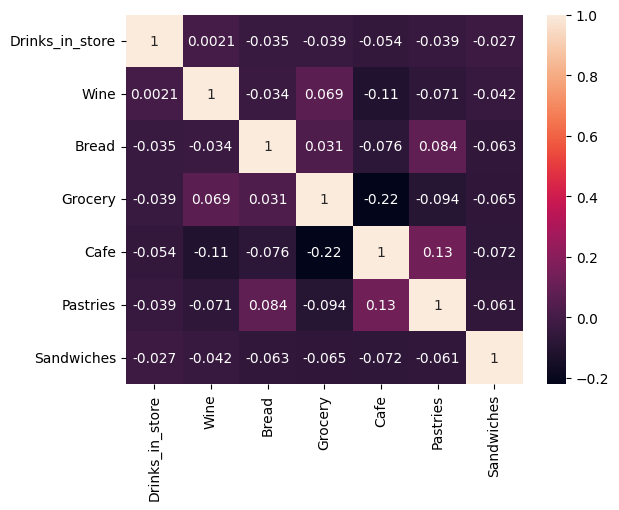

In [ ]:
import seaborn as sns

correlation_matrix = df_orders[['Drinks_in_store', 'Wine','Bread','Grocery' ,'Cafe', 'Pastries','Sandwiches']].corr()
sns.heatmap(correlation_matrix, annot=True)

**Observations:**

> - Pastries are well related with Cafe and Grocery
> - Cafe and Grocery is the most negative related
> - Cafe is only positively related to Pastries
> - Drinks in store is only positively related to Wine
> - Sandwiches are not positively related to any category
>

# **Elbow method to select the good number of clusters**

In [ ]:
from sklearn.cluster import KMeans

inertias = []
n_k = range(1, 11)


for k in n_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_orders)
    inertias.append(kmeans.inertia_)

inertias

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[23733879.83543481,
 16771568.233898941,
 13815881.446475675,
 11373796.094961226,
 9396842.644077435,
 8212293.989846849,
 7259856.509839311,
 6693873.906026061,
 6098581.46757552,
 5704363.073921905]

In [ ]:
import plotly.express as px

fig2 = px.line(inertias)
fig2

# **Training the model with 3 clusters**

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_orders)
kmeans_pred = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
labels = kmeans.predict(df_orders)
labels


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_orders['label'] = labels

# **Seaborn library to count number of samples per cluster**

<Axes: ylabel='count'>

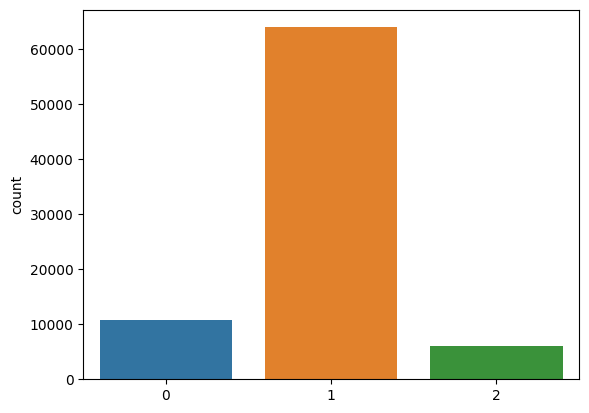

In [ ]:
import seaborn as sns

sns.countplot(x=labels)

# **Testing well correlated variables in 3D ScatterPlot**

In [ ]:
px.scatter_3d(df_orders, x='Wine', y='Bread', z='Grocery', color='label')

In [ ]:
min_max_values = df_orders.groupby('label').agg({'Wine': ['min', 'max'], 'Bread': ['min', 'max'], 'Grocery': ['min', 'max']})
min_max_values

Wine        Bread       Grocery        
        min    max   min   max     min     max
label                                         
0       0.0   50.0   0.0  28.5    9.45  200.00
1     -73.0   18.5  -8.0  35.5  -49.20   12.29
2      17.5  637.0   0.0  16.0    0.00  168.04

In [ ]:
px.scatter_3d(df_orders, x='Cafe', y='Pastries', z='Wine', color='label')

In [ ]:
px.scatter_3d(df_orders, x='Wine', y='Cafe', z='Grocery', color='label')

In [ ]:
min_max_values2 = df_orders.groupby('label').agg({'Wine': ['min', 'max'], 'Cafe': ['min', 'max'], 'Grocery': ['min', 'max']})
min_max_values2

Wine         Cafe        Grocery        
        min    max   min    max     min     max
label                                          
0       0.0   50.0   0.0   17.7    9.45  200.00
1     -73.0   18.5 -54.5  122.3  -49.20   12.29
2      17.5  637.0   0.0   15.0    0.00  168.04

In [ ]:
px.scatter_3d(df_orders, x='Wine', y='Drinks_in_store', z='Grocery', color='label')

# **Conclusions:**

**Cluster 0**: "The Coffee Buyer" > the biggest cluster/vast mojority of customers. Visit the store to buy coffe, pastries and, maybe, some grocery (max 12,5 in grocery). Representing arround 65k transactions.

**Cluster 1**: "The Wine Buyer" > the smaller cluster. Is willing to spend a large amount of money in Wine, combined with some Grocery. Representing arround 5k transactions.

**Cluster 2**: "The Grocery Buyer" > mostly spend from 12.5 in grocery + other category. Representing arround 10k transactions.